In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from tensorflow.image import central_crop

In [2]:
# load the dataset
def load_dataset(i,n):
    with h5py.File("data/quark_gluon_dataset/quark-gluon_train-set_n139306.hdf5", "r") as f:
        keys = list(f.keys())
        for i in keys:
            print(i, f[i].shape)
        data = {keys[0]: f[keys[0]][i:n],
                keys[3]: f[keys[3]][i:n]}
    return data

In [3]:
i = 0
n = 20000
data = load_dataset(i,n)

X_jets (139306, 125, 125, 3)
m0 (139306,)
pt (139306,)
y (139306,)


In [ ]:
np.savez_compressed('quark_gluon_125_20k_1.npz', **{
    'X_jets': data['X_jets'],
    'm0':data['m0'],
    'pt':data['pt'],
    'y':data['y']
})

In [5]:
zeros = (data["y"] == 0)
ones = (data["y"] == 1)
print(sum(zeros), sum(ones))

9995 10005


In [6]:
data0 = data["X_jets"][zeros]
data1 = data["X_jets"][ones]
del data

In [8]:
def display_data(data, label, thresh=0):
    fig = plt.figure(figsize=(12,12))
    r = 1
    c = 3
    for i in range(3):
        fig.add_subplot(r,c,i+1)
        if thresh:
            m = np.mean(data[:, :,:, i], axis=0).mean()
            plt.imshow(np.mean(data[:, :,:, i], axis=0) >= m) # meaning
        else:
            plt.imshow(np.log(np.mean(data[:, :,:, i], axis=0))) #meaning

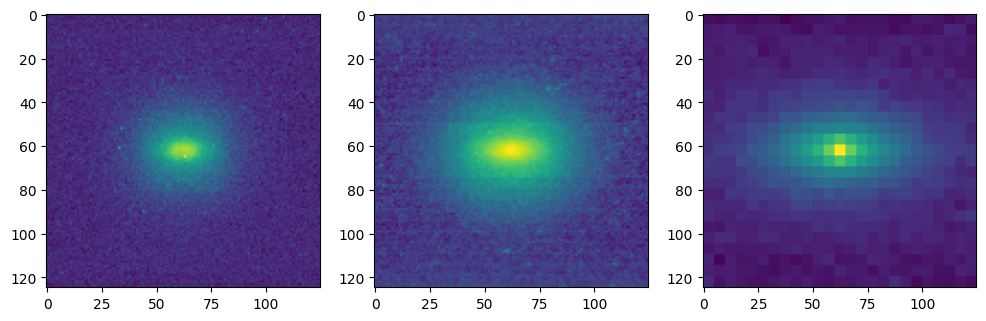

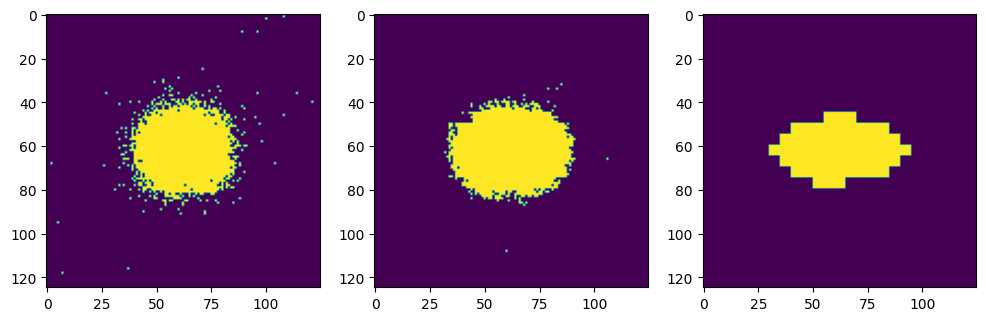

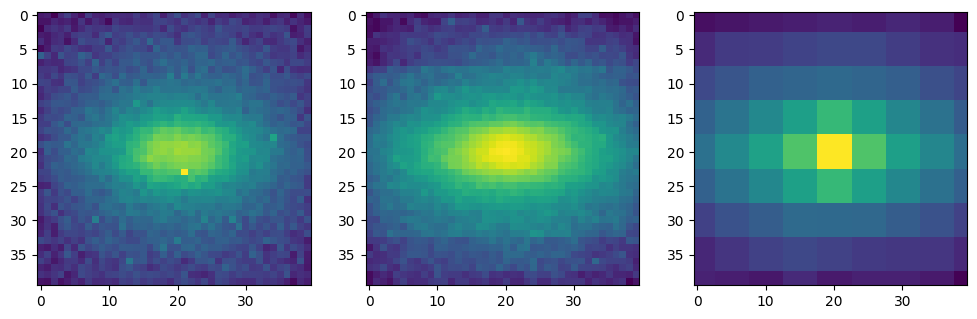

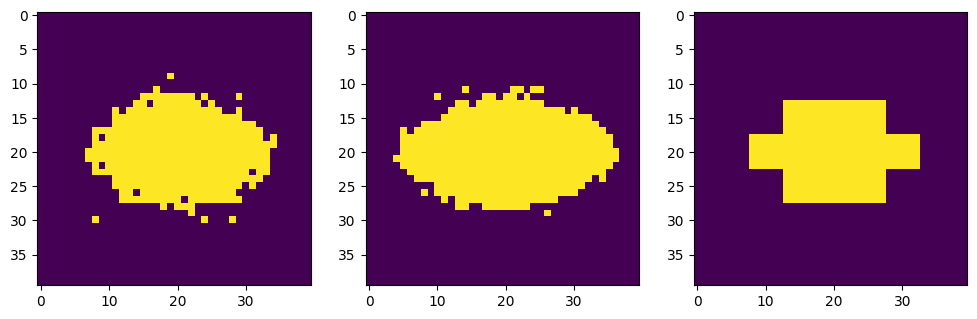

In [9]:
display_data(data0,"Gluon")
display_data(data0,"Gluon",thresh=1)

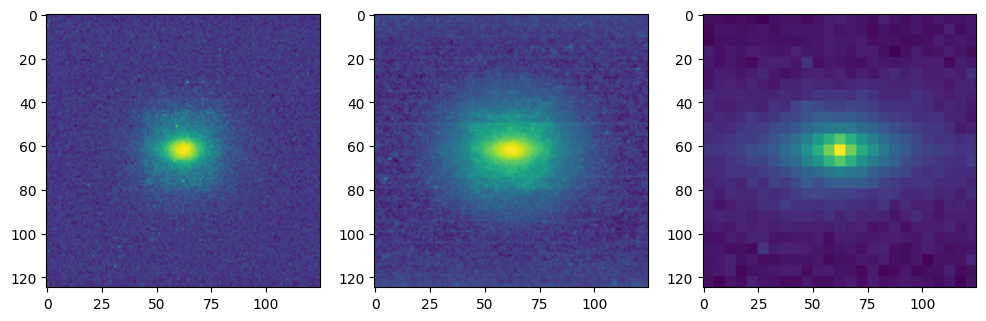

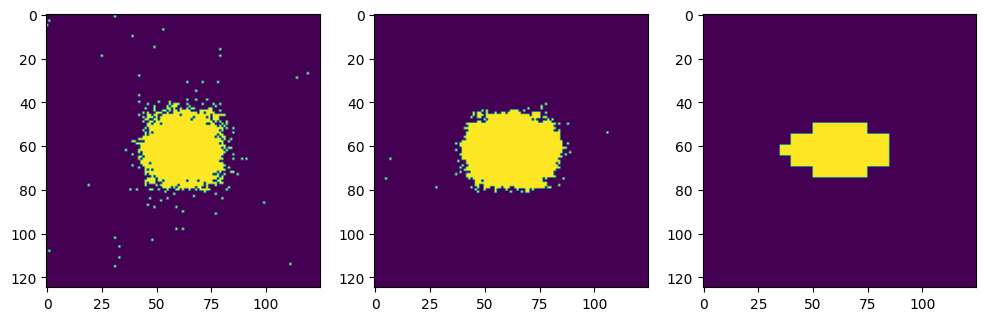

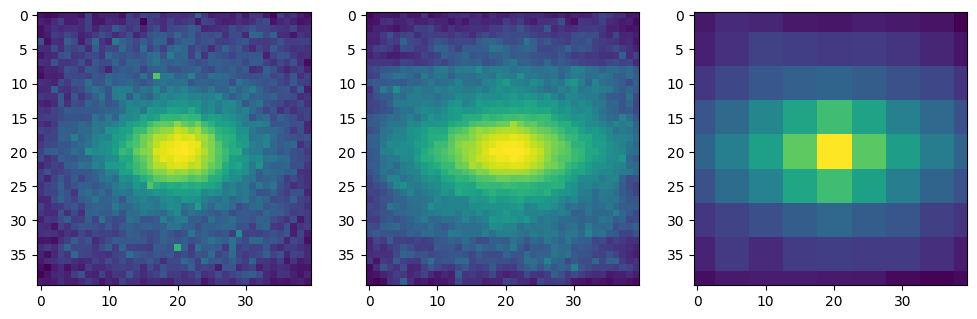

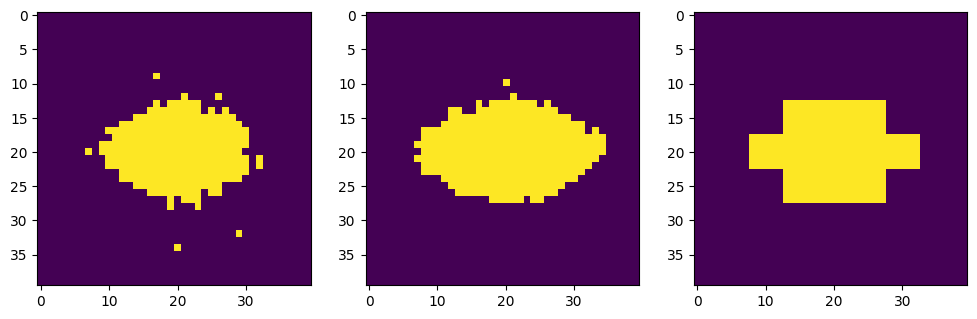

In [10]:
display_data(data1,"Quark")
display_data(data1,"Quark",thresh=1)

In [11]:
zeros = np.array([0]*len(data0))
ones = np.array([1]*len(data1))

x = np.concatenate((data0,data1), axis =0)
y = np.concatenate((zeros,ones), axis= 0)

print(x.shape, y.shape)

(20000, 40, 40, 3) (20000,)


In [12]:
del data0, data1

In [13]:
x, y = shuffle(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(18000, 40, 40, 3) (18000,)
(2000, 40, 40, 3) (2000,)


In [ ]:
# Add fourth channel


In [14]:
# Save the data
np.savez_compressed('quark_gluon_125_20k_1.npz', **{
    'x_train': x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test
})

del x_train, x_test, y_train, y_test

In [24]:
def plot(channel=0):
    fig2 = plt.figure(figsize=(10,10))
    r = 1
    c = 2
    index = [np.where(data['y_train'] == 0)[0], np.where(data['y_train'] == 1)[0]]
    for i in range(2):
        fig2.add_subplot(r,c,i+1)
        plt.imshow(np.log(np.mean(data['x_train'][index[i],:,:,channel], axis=0)))
        plt.title('Quark' if i == 0 else 'Gluon')

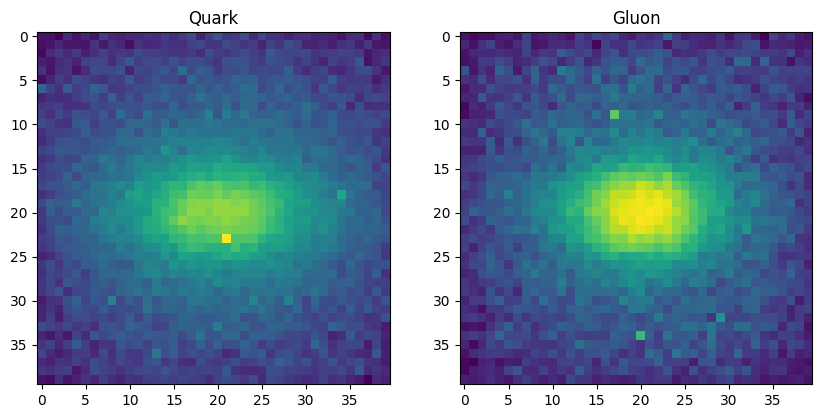

In [25]:
plot()

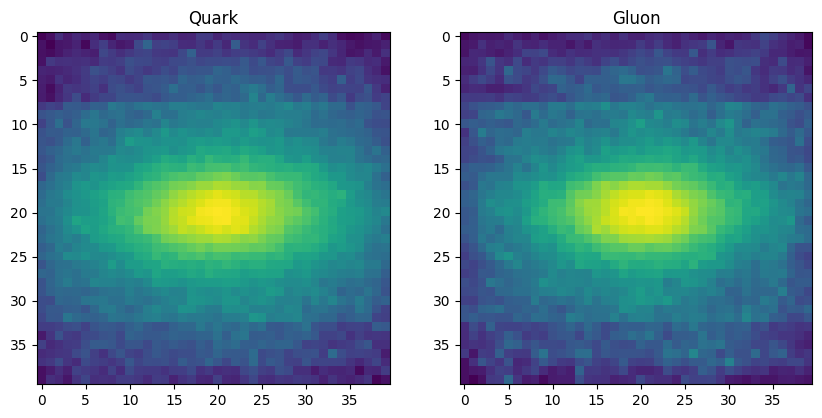

In [26]:
plot(channel=1)

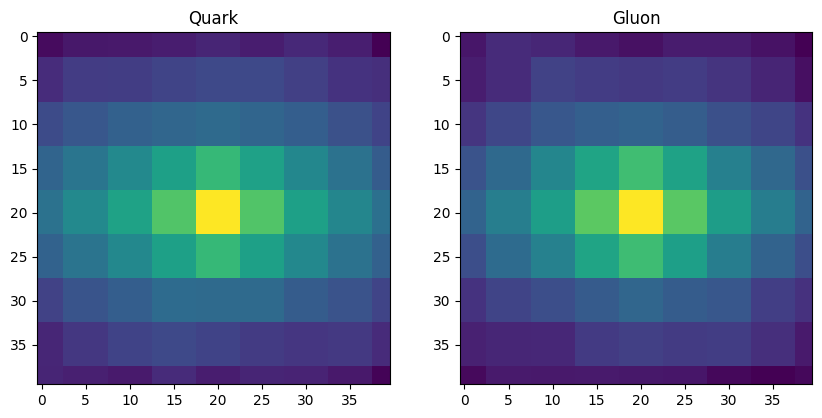

In [27]:
plot(channel=2)